クラスタ分析では、正しい答えが事前に分かっていないデータから、隠れた構造を見つけ出すことができる。<br>

<ul>
    <li>よく知られているk-meansを使って類似点の中心を見つける。</li>
    <li>階層的クラスタ木をボトムアップ形式で構築。</li>
    <li>密度に基づくクラスタリングアプローチを使ってオブジェクトの任意の形状を識別。</li>
</ul>

### K-means法を使った類似度によるオブジェクトのグループ化

k-mean法は、産業界でも学術界でも広く使用されている。<br>

### scikit-learnを使ったk-meansクラスタリング

k-means法の問題点はクラスタの個数を指定すること。<br>
kの値が悪い場合、クラスタリングの性能が悪くなる可能性が存在する。<br>
後ほど、クラスタリングの品質を評価するのに、エルボー法とシルエット図を紹介する。<br>
これらは、クラスたの最適な個数$k$を決定するのに役立つ。<br>

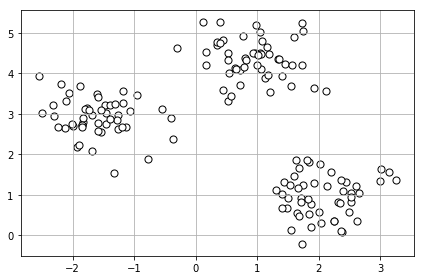

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
                            n_samples=150,
                            n_features=2,
                            centers=3,
                            cluster_std=0.5,
                            shuffle=True,
                            random_state=0
)
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

上記で作成したデータセットはランダムに生成された150個の点で構成されている。<br>

k-meansを実行する。<br>

In [9]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, # クラスタの個数
    init='random', # セントロイドの初期値をランダムに選択
    n_init=10, # 異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
    max_iter=300, # k-meansアルゴリズム内部の最大イテレーション回数
    tol=1e-4, # 収束と判定するための相対的な許容誤差 
    random_state=0 # セントロイドの初期化に用いる乱数生成器の状態
)
y_km = km.fit_predict(X)

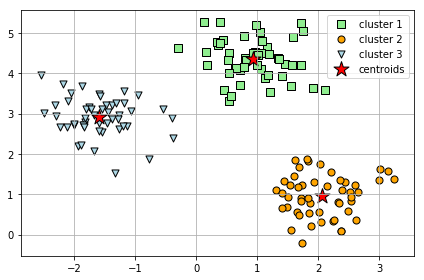

In [19]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### k-means++法を使ってセントロイドの初期値をよりスマートに設定する

ここまでは、乱数を使ってセントロイドの値を初期化した。<br>
セントロイドの初期値が不適切である場合に、クラスタリングがうまくいかなかったり、収束に時間がかかることがある。<br>
この問題に対応するのがk-means++法である。<br>

In [22]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, # クラスタの個数
    init='k-means++', # セントロイドの初期値をランダムに選択
    n_init=10, # 異なるセントロイドの初期値を用いたk-meansアルゴリズムの実行回数
    max_iter=300, # k-meansアルゴリズム内部の最大イテレーション回数
    tol=1e-4, # 収束と判定するための相対的な許容誤差 
    random_state=0 # セントロイドの初期化に用いる乱数生成器の状態
)
y_km = km.fit_predict(X)

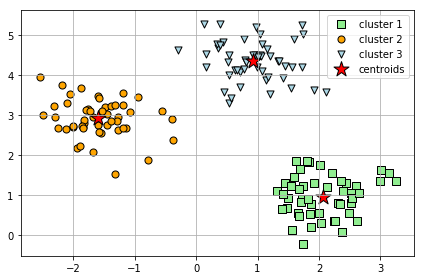

In [23]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### ハードクラスタリングとソフトクラスタリング